
> **ISO2024 INTRODUCTORY SPATIAL 'OMICS ANALYSIS**
>
>
>- HYBRID : TORONTO & ZOOM
>- 9TH JULY 2024 <br>

>**Module 6 : Drawing the boundaries ** <BR>
>
>**Instructor : Shamini Ayyadhury**
>
---

> TOPICS COVERED

* A. Classical segmentation
* B. Segmentation-free

***

In [28]:
import os
import subprocess
import scanpy as sc
import pandas as pd
import sys

sys.path.append('/home/shamini/data/projects/spatial_workshop/')
import pre_processing_fnc as ppf

In [2]:
### directory & filepaths
data_dir = '/home/shamini/data1/data_orig/data/spatial/xenium/10xGenomics/cell_seg_brain_cancer/'
out = '/home/shamini/data/projects/spatial_workshop/out/'
os.makedirs(out+'module6/figures/', exist_ok=True)
os.makedirs(out+'module6/objects/', exist_ok=True)


In [12]:

transcripts_df = pd.read_csv(data_dir+'module4/transcripts_subset_all_genes.csv')

In [13]:

transcripts_df_downsampled = transcripts_df.sample(frac=0.001)
transcripts_df_downsampled.to_csv(data_dir+'module4/transcripts_subset_all_genes_downsampled.csv', index=False)


In [15]:

# Define the Baysor command with the --save-polygons flag

# get filtered transcript files
### Read in the transcripts_df.csv file from module 2
os.makedirs(out+'module4/objects/baysor_test', exist_ok=True)
os.makedirs(out+'module4/objects/baysor_test/segmentation', exist_ok=True)


command = [
        '/home/shamini/baysor/bin/baysor/bin/baysor', 'run',
        '-c', '/home/shamini/data/projects/spatial_workshop/scripts/module4/parameters_baysor.toml',
        '-s', '9',
        '--save-polygons', 'geojson',
        '-o', os.path.join(out, 'module4/objects/baysor_test/segmentation/'),
        os.path.join(data_dir,'module4/transcripts_subset_all_genes_downsampled.csv')
        ]
subprocess.run(command, check=True)




[00:20:25] Info: Run R11dfc147d
[00:20:25] Info: (2024-07-01) Run Baysor v0.6.2
[00:20:25] Info: Loading data...
[00:20:27] Info: Loaded 1486 transcripts
[00:20:30] Info: Estimating noise level
[00:20:32] Info: Done
[00:20:46] Info: Clustering molecules...
[00:20:46] Warning: ICA did not converge, fall back to random initialization
└ Baysor.Processing /home/viktor_petukhov/.julia/dev/Baysor/src/processing/bmm_algorithm/molecule_clustering.jl:147
[00:20:48] Info: Algorithm stopped after 21 iterations. Error: 2.76e-5. Converged: true.
[00:20:48] Info: Done
[00:20:48] Info: Initializing algorithm. Scale: 9.0, scale std: 2.25, initial #components: 118, #molecules: 1486.
[00:20:48] Info: Using the following additional information about molecules: [:confidence, :cluster]
[00:20:48] Info: Using 3D coordinates
[00:20:48] Info: Processing complete.
[00:20:48] Info: Estimating local colors
[00:21:02] Warning: n=1486, which is > length(high_conf_ids) (1444)
└ Baysor.Processing /home/viktor_petukh

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


[00:21:22] Info: All done!


CompletedProcess(args=['/home/shamini/baysor/bin/baysor/bin/baysor', 'run', '-c', '/home/shamini/data/projects/spatial_workshop/scripts/module4/parameters_baysor.toml', '-s', '9', '--save-polygons', 'geojson', '-o', '/home/shamini/data/projects/spatial_workshop/out/module4/objects/baysor_test/segmentation/', '/home/shamini/data1/data_orig/data/spatial/xenium/10xGenomics/cell_seg_brain_cancer/module4/transcripts_subset_all_genes_downsampled.csv'], returncode=0)

In [17]:
os.makedirs(out+'module4/objects/baysor_test/ncv', exist_ok=True)


command = [
        '/home/shamini/baysor/bin/baysor/bin/baysor', 'segfree',
        '-c', '/home/shamini/data/projects/spatial_workshop/scripts/module4/parameters_baysor.toml',
        '-o', os.path.join(out, 'module4/objects/baysor_test/ncv/'),
        os.path.join(data_dir,'module4/transcripts_subset_all_genes_downsampled.csv')
        ]
subprocess.run(command, check=True)


[00:31:38] Info: Run Ra13c36ed4
[00:31:38] Info: # CLI params: `-c /home/shamini/data/projects/spatial_workshop/scripts/module4/parameters_baysor.toml -o /home/shamini/data/projects/spatial_workshop/out/module4/objects/baysor_test/ncv/ /home/shamini/data1/data_orig/data/spatial/xenium/10xGenomics/cell_seg_brain_cancer/module4/transcripts_subset_all_genes_downsampled.csv`
[00:31:38] Info: (2024-07-01) Run Baysor v0.6.2
[00:31:38] Info: Loading data...
[00:31:41] Info: Loaded 1486 transcripts
[00:31:42] Info: Estimating neighborhoods...
[00:31:42] Info: Estimating molecule confidences...
[00:31:43] Info: Estimating gene colors...
[00:32:02] Warning: n=1486, which is > length(high_conf_ids) (1444)
└ Baysor.Processing /home/viktor_petukhov/.julia/dev/Baysor/src/processing/data_processing/initialization.jl:180
[00:32:15] Info: Saving results...


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


[00:32:20] Info: Done!


CompletedProcess(args=['/home/shamini/baysor/bin/baysor/bin/baysor', 'segfree', '-c', '/home/shamini/data/projects/spatial_workshop/scripts/module4/parameters_baysor.toml', '-o', '/home/shamini/data/projects/spatial_workshop/out/module4/objects/baysor_test/ncv/', '/home/shamini/data1/data_orig/data/spatial/xenium/10xGenomics/cell_seg_brain_cancer/module4/transcripts_subset_all_genes_downsampled.csv'], returncode=0)

In [18]:
#### load baysor output
baysor_seg = pd.read_csv(data_dir+'module4/cell_seg_brain_cancer_baysor_workshop/segmentation/segmentation.csv')



In [19]:
baysor_seg

,Column1,transcript_id,cell_id,overlaps_nucleus,gene,x,y,z,qv,fov_name,nucleus_distance,codeword_index,molecule_id,confidence,cluster,cell,assignment_confidence,is_noise,ncv_color
0,157836975,282462819196899,jghlagom-1,0,CTNNB1,0.515625,803.72460,21.914780,40.000000,Z17,0.415854,171,1,0.99252,4,CR7fc1ba67c-1112,1.00000,False,#002E3E
1,157836976,282462819196900,jpcfbjbg-1,0,CTNNB1,0.097656,152.20898,23.486221,40.000000,Z17,0.828315,171,2,0.99904,9,CR7fc1ba67c-41,1.00000,False,#00EDFF
2,157836977,282462819196903,jghbfook-1,0,CTNNB1,0.445312,58.41797,20.532825,40.000000,Z17,0.276219,171,3,0.84880,6,CR7fc1ba67c-3,0.66667,False,#31EFFF
3,157839292,282462819211341,jpcfbjbg-1,0,CD83,0.292969,185.75586,21.277554,40.000000,Z17,0.324890,144,4,0.98966,9,CR7fc1ba67c-53,1.00000,False,#00F2FF
4,157839293,282462819211343,jghcidji-1,1,NOTCH2,0.410156,219.05273,19.567415,40.000000,Z17,0.000000,290,5,0.95479,9,CR7fc1ba67c-104,1.00000,False,#00ECFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019775,170296968,281513632352448,jlkfdjad-1,0,EDNRB,4704.543000,4312.63300,21.262210,31.155910,AA19,0.309570,427,2019776,0.98498,5,CR7fc1ba67c-70629,1.00000,False,#00EFFF
2019776,170296969,281513632352449,jlgeaoha-1,0,CDK4,4704.789000,4625.78120,22.501923,40.000000,AA19,0.413626,146,2019777,0.21340,8,CR7fc1ba67c-76262,0.66667,False,#00DDFF
2019777,170296970,281513632352450,jlkdapch-1,0,SSR4,4705.515600,3806.48630,23.138565,10.575011,AA19,2.230710,294,2019778,0.92981,8,NaN,0.66667,True,#75CEDC
2019778,170296971,281513632352452,jlkgiamb-1,0,CAV1,4704.578000,4076.34770,22.465912,28.720749,AA19,2.884766,478,2019779,0.99207,2,CR7fc1ba67c-82275,1.00000,False,#004562


In [20]:

print(f" Baysor segmentation results in {baysor_seg['cell_id'].nunique()} number of uique cells")
print(f" Original number of cells in the downsampled transcript file is {transcripts_df_downsampled['cell_id'].nunique()}")


 Baysor segmentation results in 8163 number of uique cells
 Original number of cells in the downsampled transcript file is 1531


In [21]:
### subset the same genes as before , PTPCR, ANXA1, STMN1

genes = ['PTPRC', 'ANXA1', 'STMN1']
baysor_seg_genes = baysor_seg[baysor_seg['gene'].isin(genes)]
baysor_seg_genes.head(10)

,Column1,transcript_id,cell_id,overlaps_nucleus,gene,x,y,z,qv,fov_name,nucleus_distance,codeword_index,molecule_id,confidence,cluster,cell,assignment_confidence,is_noise,ncv_color
50,157890448,282462819563919,jghjgdmd-1,0,PTPRC,0.316406,1019.431640,22.549322,10.394848,Z17,1.687361,203,51,0.99841,3,CR7fc1ba67c-1780,0.66667,False,#DEE5C2
205,158091020,281505041710735,jgibpdce-1,0,STMN1,0.195312,3196.330000,22.405909,40.000000,AA17,0.851599,345,206,0.91701,6,CR7fc1ba67c-16961,0.66667,False,#00C9FF
223,158118753,281505041947748,jgikbkdn-1,1,PTPRC,0.285156,2660.273400,22.110176,10.136827,AA17,0.000000,203,224,0.01235,1,CR7fc1ba67c-74414,0.66667,False,#00E0FF
268,158187247,281505041605346,UNASSIGNED,0,STMN1,0.773438,3971.490200,23.115683,23.350294,AA17,1.518847,345,269,0.80398,6,NaN,0.66667,True,#00C4FF
348,161183945,282462819330108,jpocnilp-1,0,STMN1,790.425800,0.048828,21.617092,40.000000,Z17,2.247070,345,349,0.89245,6,CR7fc1ba67c-1077,0.66667,False,#00CFFF
18253,161303728,282462819324347,jghcnaik-1,0,STMN1,1.914062,107.087890,22.697530,23.249954,Z17,3.491614,345,18254,0.58593,6,CR7fc1ba67c-20,0.66667,False,#00E1FF
18255,161303730,282462819324349,jgjmlafd-1,1,STMN1,2.453125,842.318360,24.927584,34.959274,Z17,0.000000,345,18256,0.99904,4,CR7fc1ba67c-1290,0.66667,False,#002C48
18259,161303734,282462819324355,jghcnaik-1,0,STMN1,3.398438,132.492190,25.224604,19.985735,Z17,0.928139,345,18260,0.99588,6,CR7fc1ba67c-30,1.00000,False,#00E6FF
18265,161303740,282462819324370,jghkfdlg-1,0,PTPRC,5.765625,583.730470,25.590778,40.000000,Z17,0.375977,203,18266,0.99959,3,CR7fc1ba67c-581,0.33333,False,#73A698
18267,161303742,282462819324374,jghjfiol-1,0,STMN1,6.222656,1043.910200,24.017681,40.000000,Z17,1.312306,345,18268,0.99643,6,CR7fc1ba67c-1894,0.66667,False,#ACCEFF


In [22]:

cells_stmn1 = baysor_seg_genes['cell_id'][baysor_seg_genes['gene']=='STMN1'].unique()
cells_anxa1 = baysor_seg_genes['cell_id'][baysor_seg_genes['gene']=='ANXA1'].unique()
cells_ptprc = baysor_seg_genes['cell_id'][baysor_seg_genes['gene']=='PTPRC'].unique()

### cells expressing all 3 genes
cells_all = set(cells_stmn1) & set(cells_anxa1) & set(cells_ptprc)

### cells expressing stmn1 & anxa1
cells_stmn1_anxa1 = set(cells_stmn1) & set(cells_anxa1)

### cells expressing stmn1 & ptprc
cells_stmn1_ptprc = set(cells_stmn1) & set(cells_ptprc)

### cells expressing anxa1 & ptprc
cells_anxa1_ptprc = set(cells_anxa1) & set(cells_ptprc)

print(f" Number of cells expressing all 3 genes is {len(cells_all)}")
print(f" Number of cells expressing STMN1 and ANXA1 is {len(cells_stmn1_anxa1)}")
print(f" Number of cells expressing STMN1 and PTPRC is {len(cells_stmn1_ptprc)}")
print(f" Number of cells expressing ANXA1 and PTPRC is {len(cells_anxa1_ptprc)}")

### print cells expressing single genes
print(f" Number of cells expressing STMN1 is {len(cells_stmn1)}")
print(f" Number of cells expressing ANXA1 is {len(cells_anxa1)}")
print(f" Number of cells expressing PTPRC is {len(cells_ptprc)}")

 Number of cells expressing all 3 genes is 596
 Number of cells expressing STMN1 and ANXA1 is 2771
 Number of cells expressing STMN1 and PTPRC is 1293
 Number of cells expressing ANXA1 and PTPRC is 726
 Number of cells expressing STMN1 is 6444
 Number of cells expressing ANXA1 is 3432
 Number of cells expressing PTPRC is 1613


In [23]:
### repeat with baysor cell centers
cells_stmn1_b = baysor_seg_genes['cell'][baysor_seg_genes['gene']=='STMN1'].unique()
cells_anxa1_b = baysor_seg_genes['cell'][baysor_seg_genes['gene']=='ANXA1'].unique()
cells_ptprc_b = baysor_seg_genes['cell'][baysor_seg_genes['gene']=='PTPRC'].unique()

### cells expressing all 3 genes
cells_all_b = set(cells_stmn1_b) & set(cells_anxa1_b) & set(cells_ptprc_b)

### cells expressing stmn1 & anxa1
cells_stmn1_anxa1_b = set(cells_stmn1_b) & set(cells_anxa1_b)

### cells expressing stmn1 & ptprc
cells_stmn1_ptprc_b = set(cells_stmn1_b) & set(cells_ptprc_b)

### cells expressing anxa1 & ptprc
cells_anxa1_ptprc_b = set(cells_anxa1_b) & set(cells_ptprc_b)

print(f" Number of cells expressing all 3 genes is {len(cells_all_b)}")
print(f" Number of cells expressing STMN1 and ANXA1 is {len(cells_stmn1_anxa1_b)}")
print(f" Number of cells expressing STMN1 and PTPRC is {len(cells_stmn1_ptprc_b)}")
print(f" Number of cells expressing ANXA1 and PTPRC is {len(cells_anxa1_ptprc_b)}")

### print cells expressing single genes
print(f" Number of cells expressing STMN1 is {len(cells_stmn1_b)}")
print(f" Number of cells expressing ANXA1 is {len(cells_anxa1_b)}")
print(f" Number of cells expressing PTPRC is {len(cells_ptprc_b)}")



 Number of cells expressing all 3 genes is 22
 Number of cells expressing STMN1 and ANXA1 is 1144
 Number of cells expressing STMN1 and PTPRC is 424
 Number of cells expressing ANXA1 and PTPRC is 135
 Number of cells expressing STMN1 is 19711
 Number of cells expressing ANXA1 is 6431
 Number of cells expressing PTPRC is 2481


In [26]:
### old and new segmentation files

import json

with open(data_dir+'module4/cell_seg_brain_cancer_baysor_workshop/segmentation/segmentation_polygons.json') as f:
    baysor_boundaries = json.load(f)

orig_boundaries = pd.read_csv(data_dir+'module4/cell_boundaries_subset.csv')


Shape of iF_crop: (4, 4705, 4705)
Channel 0 max: 9350, min: 6
Channel 1 max: 10806, min: 0
Channel 2 max: 10972, min: 2
Channel 3 max: 8295, min: 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.6224868].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.6224868].


Text(0.5, 1.0, 'Baysor segmentation')

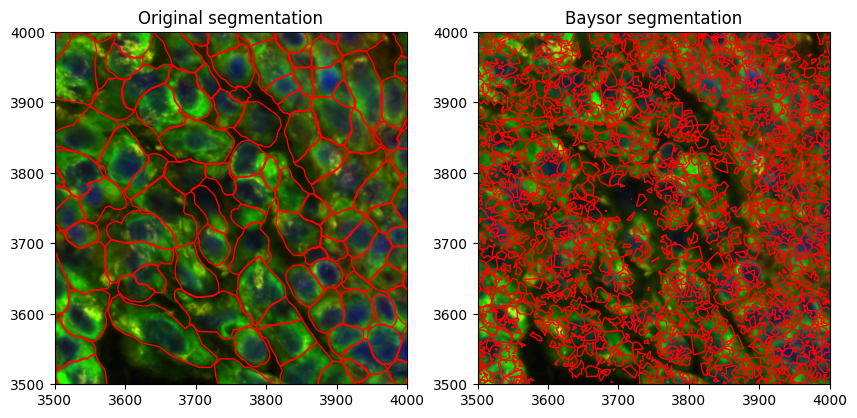

In [57]:
### plotting the segmentation results
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import tifffile as tiff


iF_crop = tiff.imread(data_dir+'module4/cropped_image_fluo.tif')
composite_image = ppf.plot_composite_image(iF_crop)


fig, ax = plt.subplots(1, 2, figsize=(10, 10))

xlower = 0
ylower = 2000
xlim = [xlower, xlower+600]
ylim = [ylower, ylower+600]

### plot the original segmentation

ax[0].imshow(composite_image)

grouped = orig_boundaries.groupby('cell_id')

for cell_id, group in grouped:
    group = pd.concat([group, group.iloc[:1]])
    plg = Polygon(group[['vertex_x', 'vertex_y']].values, edgecolor='red', facecolor='none')
    ax[0].add_patch(plg)

ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)
ax[0].set_title('Original segmentation')


### now plot tje baysor segmentation which is a json file
ax[1].imshow(composite_image)


for cell in baysor_boundaries['geometries']:
    plg = cell['coordinates'][0]
    plg.append(plg[0])
    plg = Polygon(plg, edgecolor='red', facecolor='none', closed=True)
    ax[1].add_patch(plg)
    ax[1].set_xlim(xlim)
    ax[1].set_ylim(ylim)
ax[1].set_title('Baysor segmentation')
     


In [36]:
baysor_seg

,Column1,transcript_id,cell_id,overlaps_nucleus,gene,x,y,z,qv,fov_name,nucleus_distance,codeword_index,molecule_id,confidence,cluster,cell,assignment_confidence,is_noise,ncv_color
0,157836975,282462819196899,jghlagom-1,0,CTNNB1,0.515625,803.72460,21.914780,40.000000,Z17,0.415854,171,1,0.99252,4,CR7fc1ba67c-1112,1.00000,False,#002E3E
1,157836976,282462819196900,jpcfbjbg-1,0,CTNNB1,0.097656,152.20898,23.486221,40.000000,Z17,0.828315,171,2,0.99904,9,CR7fc1ba67c-41,1.00000,False,#00EDFF
2,157836977,282462819196903,jghbfook-1,0,CTNNB1,0.445312,58.41797,20.532825,40.000000,Z17,0.276219,171,3,0.84880,6,CR7fc1ba67c-3,0.66667,False,#31EFFF
3,157839292,282462819211341,jpcfbjbg-1,0,CD83,0.292969,185.75586,21.277554,40.000000,Z17,0.324890,144,4,0.98966,9,CR7fc1ba67c-53,1.00000,False,#00F2FF
4,157839293,282462819211343,jghcidji-1,1,NOTCH2,0.410156,219.05273,19.567415,40.000000,Z17,0.000000,290,5,0.95479,9,CR7fc1ba67c-104,1.00000,False,#00ECFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019775,170296968,281513632352448,jlkfdjad-1,0,EDNRB,4704.543000,4312.63300,21.262210,31.155910,AA19,0.309570,427,2019776,0.98498,5,CR7fc1ba67c-70629,1.00000,False,#00EFFF
2019776,170296969,281513632352449,jlgeaoha-1,0,CDK4,4704.789000,4625.78120,22.501923,40.000000,AA19,0.413626,146,2019777,0.21340,8,CR7fc1ba67c-76262,0.66667,False,#00DDFF
2019777,170296970,281513632352450,jlkdapch-1,0,SSR4,4705.515600,3806.48630,23.138565,10.575011,AA19,2.230710,294,2019778,0.92981,8,NaN,0.66667,True,#75CEDC
2019778,170296971,281513632352452,jlkgiamb-1,0,CAV1,4704.578000,4076.34770,22.465912,28.720749,AA19,2.884766,478,2019779,0.99207,2,CR7fc1ba67c-82275,1.00000,False,#004562


In [55]:

for cell in baysor_boundaries['geometries']:
    plg = cell['coordinates'][0]
    plg.append(plg[0])
    plg = Polygon(plg, edgecolor='red', facecolor='none', closed=True)
    ax[1].add_patch(plg)
    ax[1].set_xlim(3500,4000)
    ax[1].set_ylim(3500,4000)

In [56]:
plg

[[[4416.1562, 1354.3359],
  [4418.4688, 1355.4297],
  [4416.922, 1359.6367],
  [4416.754, 1365.6602],
  [4419.117, 1369.1816],
  [4419.746, 1366.6582],
  [4424.5273, 1366.5098],
  [4425.4727, 1367.7793],
  [4426.7305, 1368.8457],
  [4429.043, 1368.4336],
  [4428.707, 1364.9023],
  [4430.4453, 1366.623],
  [4434.4844, 1364.8594],
  [4435.176, 1365.5566],
  [4436.1797, 1360.0938],
  [4434.75, 1360.6504],
  [4432.301, 1359.2773],
  [4435.176, 1356.8301],
  [4436.91, 1354.5742],
  [4430.3906, 1354.4355],
  [4427.9414, 1351.9922],
  [4425.7227, 1350.4355],
  [4424.84, 1347.9961],
  [4422.379, 1348.1855],
  [4420.6016, 1351.6465],
  [4418.789, 1353.4766],
  [4416.1562, 1354.3359]]]